In [0]:
!git clone https://github.com/rslim087a/track


fatal: destination path 'track' already exists and is not an empty directory.


In [0]:
!ls track


driving_log.csv  IMG


In [0]:
!pip3 install imgaug

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Convolution2D ,MaxPooling2D ,Dense ,Dropout, Flatten
from keras.optimizers import Adam
import cv2
import ntpath
import random
from sklearn.utils import shuffle
import os
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

In [0]:
#To read data

colums=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv('track/driving_log.csv',names=colums)
pd.set_option('display.max_colwidth',-1)
data.head()

center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.649786  
1  0.0       0.0       0.0      0.627942  
2  0.0       0.0       0.0      0.622910  
3  0.0       0.0       0.0      0.619162  
4  0.0       0.0       0.0      0.615438

In [0]:
#To delete the path of the images 

def path_split(path):
  head,tail =ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_split)
data['left']=data['left'].apply(path_split)
data['right']=data['right'].apply(path_split)

data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg  0.0       0.0       0.0      0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0       0.0       0.0      0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0       0.0       0.0      0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0       0.0       0.0      0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0       0.0       0.0      0.615438

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


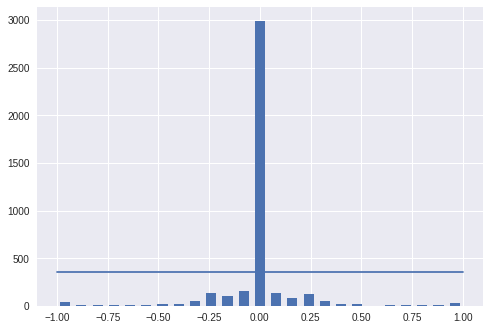

In [0]:
#To know the number of samples to each angle

num_bins=25 #Number of colmns 

values ,bins = np.histogram(data['steering'],num_bins)
print(bins)

# To make the cenetr is Zero
cenetr=(bins[:-1]+bins[1:])*0.5
print(cenetr)

plt.bar(cenetr,values,width=0.05)

# becouse the number of samples to steering zero is too many then make threshold
sampl_per_steering=350
plt.plot((np.min(data['steering']),np.max(data['steering'])),(sampl_per_steering,sampl_per_steering))

In [0]:
#To Delete some datat to prevent bais data to specific angle

print("ALL samples :" , len(data))
remove_list=[]
for j in range(num_bins):
  list_=[]
  for i in range(len(data['steering'])):
    if data['steering'][i]>=bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_=shuffle(list_)
  list_=list_[sampl_per_steering:]
  remove_list.extend(list_)
  
print("Remove samples :" , len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print("remining samples :" , len(data))

ALL samples : 4053
Remove samples : 2640
remining samples : 1413


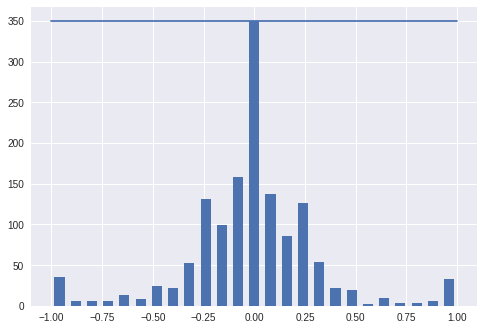

In [0]:

values ,bins = np.histogram(data['steering'],num_bins)
cenetr=(bins[:-1]+bins[1:])*0.5
plt.bar(cenetr,values,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(sampl_per_steering,sampl_per_steering))

In [0]:
#To split data into train val
X_train,X_val,y_train,y_val=train_test_split(features,labels,test_size=0.2,random_state=6)
print('Train data {} \n Validation data {}'.format(len(X_train),len(X_val)))

Train data 1130 
 Validation data 283


In [0]:
#To make the features and label
print(data.iloc[1])
def load_feat_lab(datadir,data):
  image_path=[]
  label=[]
  for i in range(len(data)):
    data_index=data.iloc[i]
    center,left,right=data_index[0],data_index[1],data_index[2]
    steering=data_index[3]
    image_path.append(os.path.join(datadir,center.strip()))
    label.append(float(steering))
  image_paths=np.asarray(image_path)
  labels=np.asarray(label)
  return image_paths,labels

features,labels=load_feat_lab('track/IMG',data)

center      center_2018_07_16_17_11_44_413.jpg
left        left_2018_07_16_17_11_44_413.jpg  
right       right_2018_07_16_17_11_44_413.jpg 
steering   -0.05                              
throttle    0.642727                          
reverse     0                                 
speed       1.43401                           
Name: 12, dtype: object


Text(0.5, 1.0, 'Validation Data')

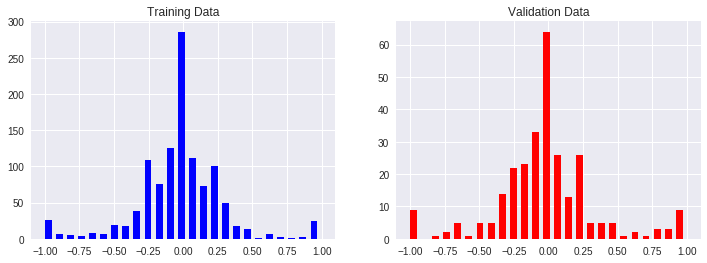

In [0]:
#To visualize train and test data to ensure the data is blanced

fig,axs=plt.subplots(1,2,figsize=(12,4))
axs[0].hist(y_train,bins=num_bins,color='blue',width=0.05)
axs[0].set_title('Training Data')

axs[1].hist(y_val,bins=num_bins,color='red',width=0.05)
axs[1].set_title('Validation Data')

Text(0.5, 1.0, 'Zoomed Image')

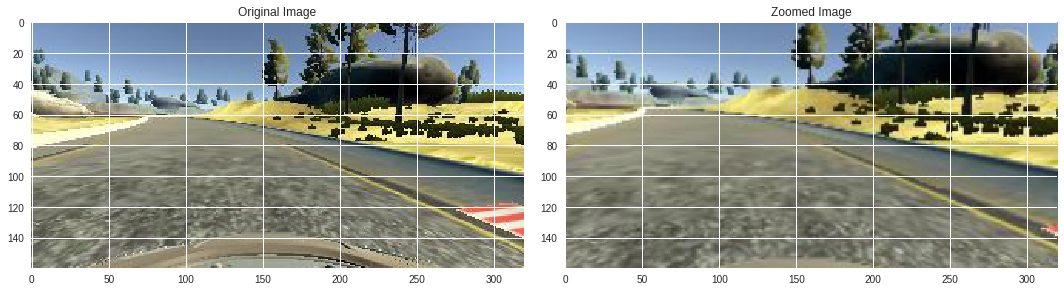

In [0]:
#Zoom image

def zoom (image):
  zoom=iaa.Affine(scale=(1,1.3))
  image=zoom.augment_image(image)
  return image 




#visualize  the agumenetd image
image = features[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')




Text(0.5, 1.0, 'Pannding Image')

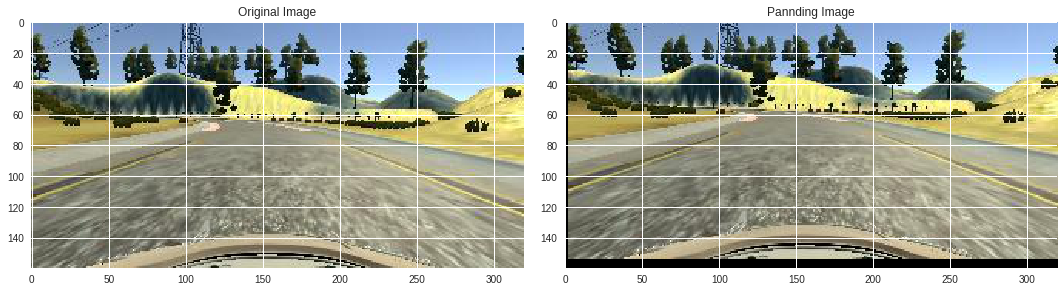

In [0]:
#panding --> horizontal or vertical translation 
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image


#visualize  the agumenetd image
image = features[random.randint(0, 1000)]
original_image = mpimg.imread(image)
pan_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(pan_image)
axs[1].set_title('Pannding Image')




Text(0.5, 1.0, 'brightness Image')

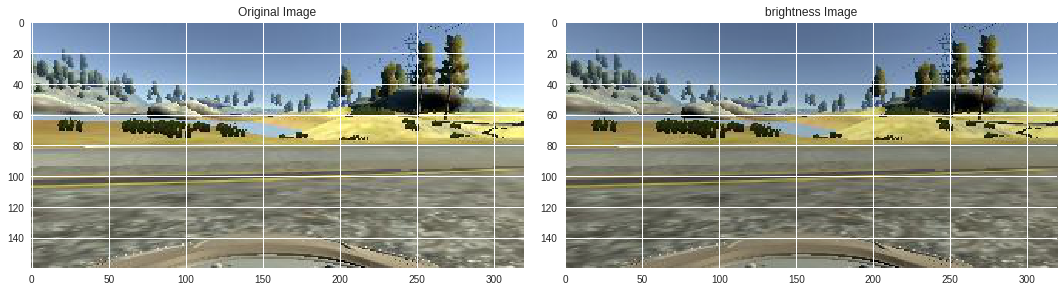

In [0]:
#to change in brightness of image 
def ch_brightness(image):
  bright=iaa.Multiply((0.2,1.2)) # multiply all pixel intensity  inside the image ->intensity multiply by vlaue less than 1 will become darker
  image=bright.augment_image(image)
  return image


#visualize  the agumenetd image
image = features[random.randint(0, 1000)]
original_image = mpimg.imread(image)
br_image = ch_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(br_image)
axs[1].set_title('brightness Image')

Text(0.5, 1.0, 'Flipping Image streering :0.15')

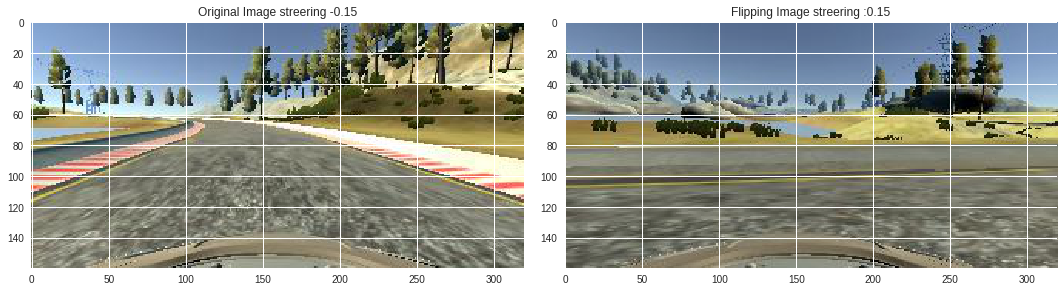

In [0]:

#flipping image 
# flipping provided  additional balanced for dataset

def  img_flipp(image ,steering_angle):
  image=cv2.flip(image,-1)   #-1 indicate to flip in both diirection 
  steering_angle=-steering_angle
  return image,steering_angle


#visualize  the agumenetd image
randnum=random.randint(0, 1000)
image = features[randnum]
Original_steering=labels[randnum]
original_image = mpimg.imread(image)
fipping_image,Agumeneted_steering = img_flipp(original_image,Original_steering)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image streering '+str(Original_steering))

axs[1].imshow(br_image)
axs[1].set_title('Flipping Image streering :'+str(Agumeneted_steering))

In [0]:
#This meann each augmentation will occur  50% 

def agumented_image(image,steering_angle):
  image=mpimg.imread(image)
  if np.random.rand()<0.5:
    image=pan(image)
  if np.random.rand()<0.5:
    image=zoom(image)
  if np.random.rand()<0.5:
    image=ch_brightness(image)
  if np.random.rand()<0.5:
    image,steering_angle=img_flipp(image,steering_angle)
  return image,steering_angle

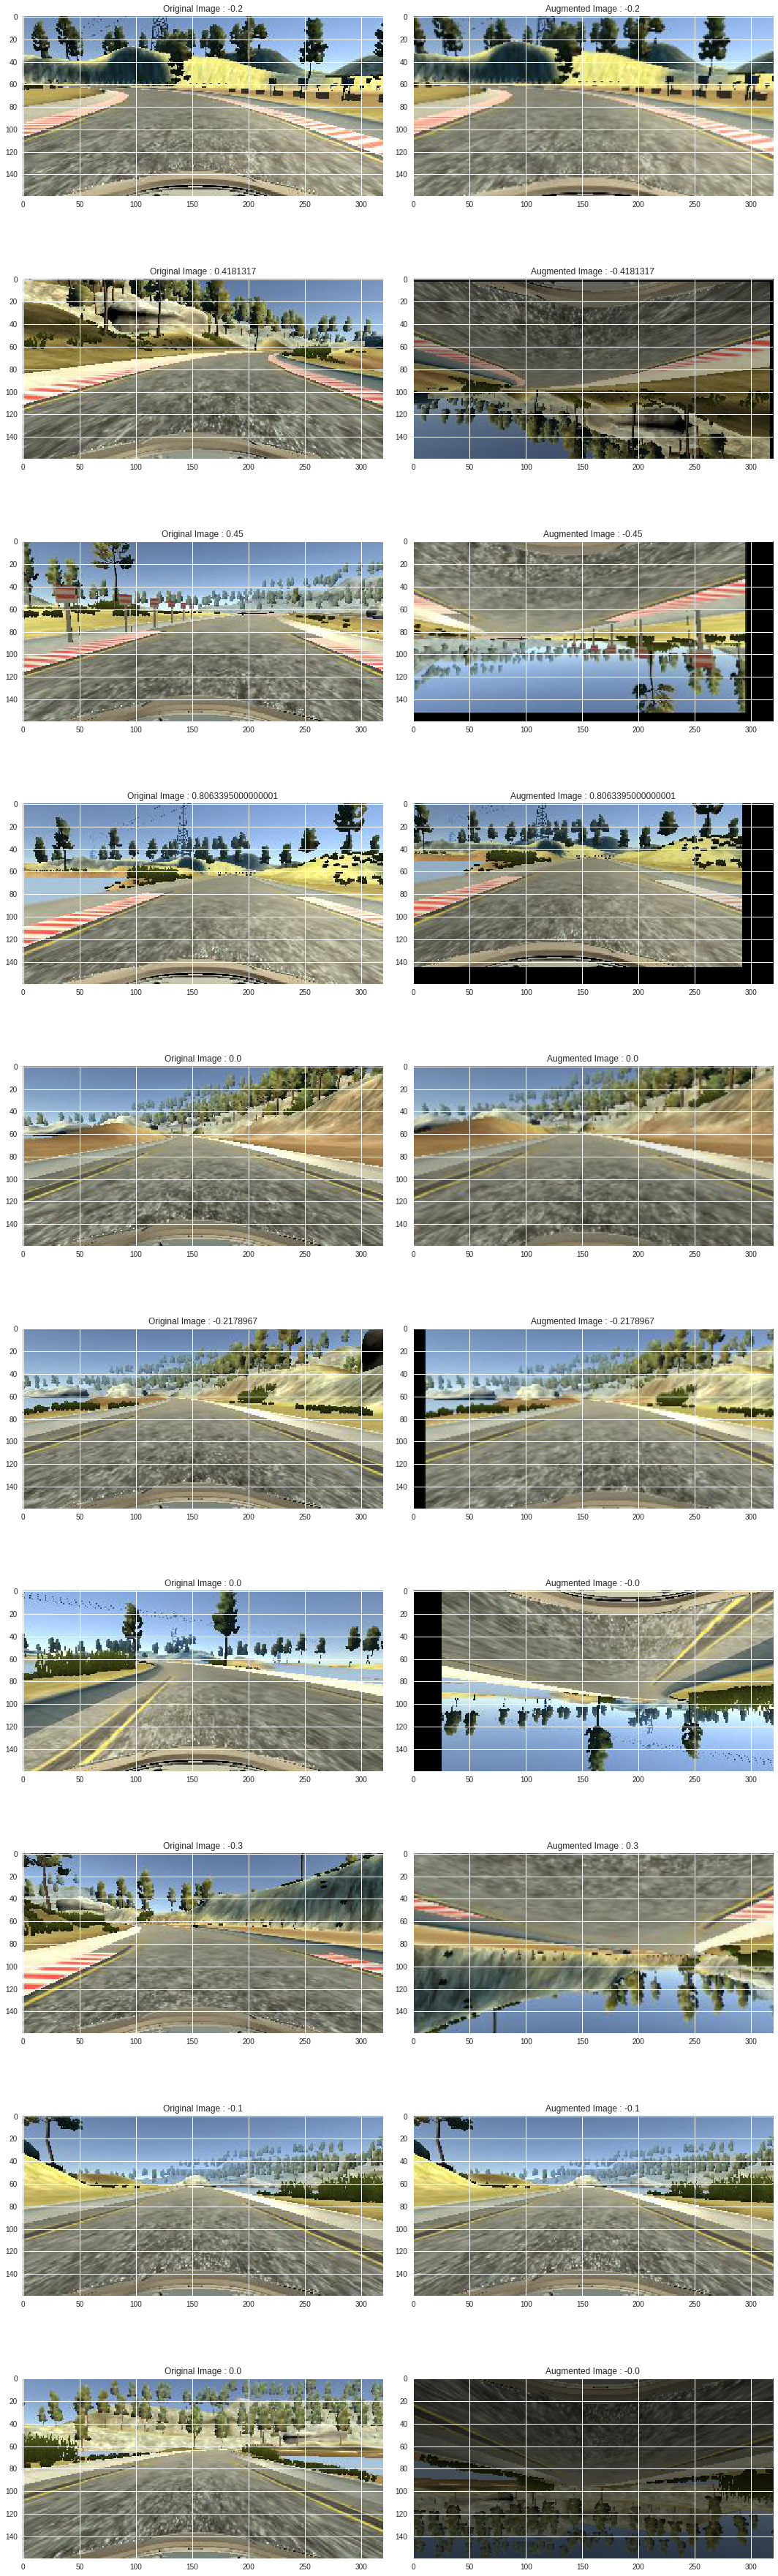

In [0]:
#visualize the agumented images 
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(features) - 1)
  random_image = features[randnum]
  random_steering = labels[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = agumented_image(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image : "+ str(random_steering))
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image : " +str(steering ))

In [0]:
#Preprocessing data 
def img_preprocessing(img):
  img=mpimg.imread(img)
  img=img[60:135,:,:]
  img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img,(3,3),0)
  img=cv2.resize(img,(200,66))
  img=img/255
  return img
def img_preprocessing2(img):
  img=img[60:135,:,:]
  img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img,(3,3),0)
  img=cv2.resize(img,(200,66))
  img=img/255
  return img

Text(0.5, 1.0, 'Preprocessing Image')

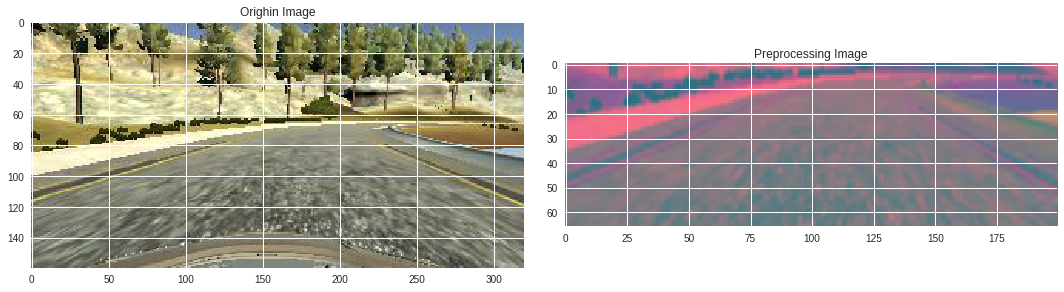

In [0]:
#To visuale the original image and preprocessing image 

org_img=img=mpimg.imread(X_train[100])
prep_img=img_preprocessing(X_train[100])

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(org_img)
axs[0].set_title('Orighin Image')

axs[1].imshow(prep_img)
axs[1].set_title('Preprocessing Image')

In [0]:
#yield keyword still return disered output of batch_generator and also saved all initialize values inside the batch_generator 
def batch_generator (image_paths,steering_ang,batch_size,istraining):
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = agumented_image(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocessing2(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering)) 
      


In [0]:
X_train_gen=next(batch_generator(X_train,y_train,1,1))
X_val_gen=next(batch_generator(X_val,y_val,1,0))



In [0]:
#to perform preprocessing on data
#X_train=np.array(list(map(img_preprocessing,X_train)))
#X_val=np.array(list(map(img_preprocessing,X_val)))

In [0]:
#img=X_train[random.randint(0,len(X_train)-1)]
#plt.imshow(img)
#plt.axis('off')

#print(X_train.shape)

In [0]:
#create the model 
def create_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  #model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model


In [0]:
model=create_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dens

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

In [0]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=12,
                                  validation_data=batch_generator(X_val, y_val, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
300/300 [==============================] - 183s 610ms/step - loss: 0.1131 - val_loss: 0.1322
Epoch 2/12
300/300 [==============================] - 178s 594ms/step - loss: 0.0908 - val_loss: 0.0862
Epoch 3/12
300/300 [==============================] - 166s 553ms/step - loss: 0.0766 - val_loss: 0.0648
Epoch 4/12
300/300 [==============================] - 166s 553ms/step - loss: 0.0577 - val_loss: 0.0549
Epoch 5/12
300/300 [==============================] - 171s 571ms/step - loss: 0.0492 - val_loss: 0.0456
Epoch 6/12
300/300 [==============================] - 178s 592ms/step - loss: 0.0433 - val_loss: 0.0399
Epoch 7/12
300/300 [==============================] - 175s 582ms/step - loss: 0.0396 - val_loss: 0.0367
Epoch 8/12
300/300 [==============================] - 167s 557ms/step - loss: 0.0353 - val_loss: 0.0356
Epoch 9/12
300/300 [==============================] - 168s 560ms/step - loss: 0.0330 - val_loss: 0.0351
Epoch 10/12
300/

Text(0.5, 0, 'epochs')

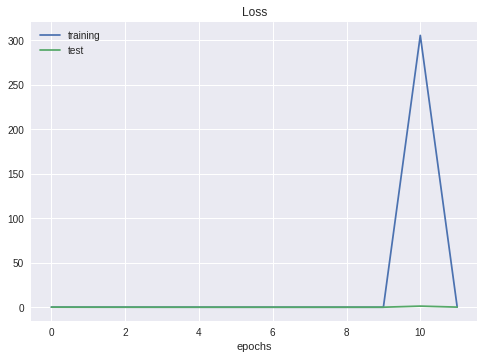

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','test'])
plt.title('Loss')
plt.xlabel('epochs')

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')